# Preprocess image files

Dataset from Kaggle --> https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

In [12]:
import os
import cv2
import requests
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.utils import to_categorical

from numpy import zeros, newaxis

from sklearn.metrics.cluster import rand_score
from skimage.metrics import structural_similarity as compare_ssim

#import warnings
#warnings.simplefilter('ignore')

In [13]:
# Benign images directory path
train_b_dir = 'input/melanoma_cancer_dataset/train/benign/'
# Malignant images directory path
train_m_dir = 'input/melanoma_cancer_dataset/train/malignant/'
# Benign images directory path
test_b_dir = 'input/melanoma_cancer_dataset/test/benign/'
# Malignant images directory path
test_m_dir = 'input/melanoma_cancer_dataset/test/malignant/'

image_files = []
y_label = []

# Benign images
for file in os.listdir(train_b_dir):
    image_files.append(train_b_dir+file)
    y_label.append(0)

# Malignant images 
for file in os.listdir(train_m_dir):
    image_files.append(train_m_dir+file)
    y_label.append(1)
    
# Benign images
for file in os.listdir(test_b_dir):
    image_files.append(test_b_dir+file)
    y_label.append(0)
    
# Malignant images 
for file in os.listdir(test_m_dir):
    image_files.append(test_m_dir+file)
    y_label.append(1)

print(f"Number of Image files: {len(image_files)}")
print(image_files[0:3])
print(f"Number of Y labels: {len(y_label)}")
print(y_label[0:3])


Number of Image files: 10606
['input/melanoma_cancer_dataset/train/benign/melanoma_1448.jpg', 'input/melanoma_cancer_dataset/train/benign/melanoma_2141.jpg', 'input/melanoma_cancer_dataset/train/benign/melanoma_4530.jpg']
Number of Y labels: 10606
[0, 0, 0]


### Open all images

In [14]:
# Create and empty list for images
all_images = []

for i in range(len(image_files)):
    img_file = image_files[i]
    # Print a statement to show progress
    print(f"{i}/{len(image_files)}: Attempting to import {img_file}")
    #print(f"y_train_df {y_train[i]}")

    # Open the image and append to the list
    with Image.open(img_file) as img:
        all_images.append(img.copy())

# View the first image to confirm
all_images[0]

0/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_1448.jpg
1/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_2141.jpg
2/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_4530.jpg
3/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_4256.jpg
4/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_3539.jpg
5/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_2627.jpg
6/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_4242.jpg
7/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_2633.jpg
8/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_2155.jpg
9/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_4524.jpg
10/10606: Attempting to import input/melanoma_cancer_dataset/train/benign/melanoma_3263.jp

IsADirectoryError: [Errno 21] Is a directory: '/Users/LASA/Documents/workspace/Project-3_Group-9/input/melanoma_cancer_dataset/train/malignant/.ipynb_checkpoints'

### Open all TEST images

In [4]:
# Check image sizes
# Get all the sizes into a list, then convert to a set
sizes = set([img.size for img in all_images])
print(sizes)

{(300, 300)}


### Malignant images plot

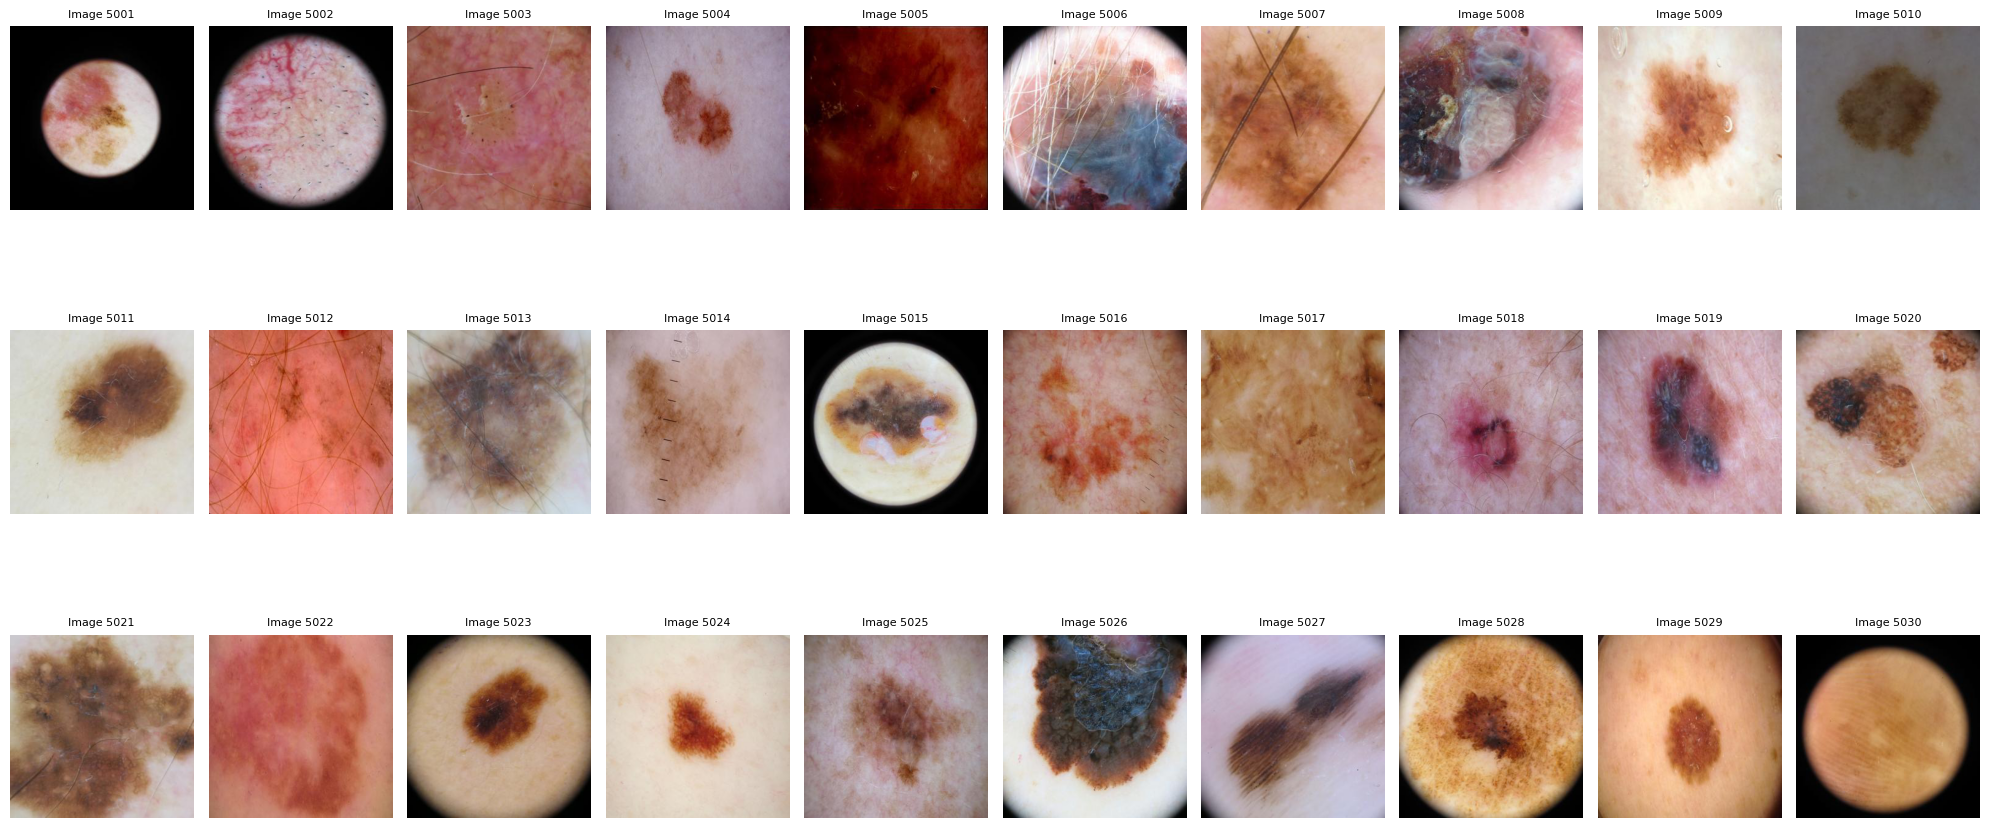

In [6]:
# Set up the subplot grid
fig, axes = plt.subplots(3, 10, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over the subplot grid
for i, ax in enumerate(axes.flat):
    if i < 50:
        # Read the image
        i += 5000              # NOTE: Malignant images start after a count of 5000 in the list of images
        img = all_images[i]
        
        # Display the image
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels
        ax.set_title(f'Image {i+1}', fontsize=8)
    else:
        # Remove the empty subplot
        ax.remove()

plt.tight_layout()
plt.show()

In [5]:
# Convert all images to floating point numpy arrays
all_images_float = [np.array(img).astype(np.float32) for img in all_images]
#all_images_float = [np.array(img).astype(np.float32)/255 for img in all_images]  <-- can normalize right here

# Display the pixel values of the first image
print("Pixel Values:")
print(all_images_float[0])

Pixel Values:
[[[194. 155. 156.]
  [195. 156. 157.]
  [197. 158. 159.]
  ...
  [183. 144. 137.]
  [180. 141. 134.]
  [177. 138. 131.]]

 [[194. 155. 156.]
  [195. 156. 157.]
  [197. 158. 159.]
  ...
  [182. 143. 136.]
  [180. 141. 134.]
  [178. 139. 132.]]

 [[194. 155. 156.]
  [196. 157. 158.]
  [198. 159. 160.]
  ...
  [180. 141. 134.]
  [180. 141. 134.]
  [180. 141. 134.]]

 ...

 [[181. 146. 150.]
  [181. 146. 150.]
  [182. 147. 151.]
  ...
  [163. 122. 118.]
  [161. 120. 114.]
  [159. 118. 112.]]

 [[179. 144. 148.]
  [180. 145. 149.]
  [180. 145. 149.]
  ...
  [161. 120. 116.]
  [159. 118. 112.]
  [156. 115. 109.]]

 [[178. 143. 147.]
  [178. 143. 147.]
  [179. 144. 148.]
  ...
  [160. 119. 115.]
  [158. 117. 111.]
  [156. 115. 109.]]]


In [6]:
# To normalize pixel values to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

all_imgs_normalized = [img/255 for img in all_images_float]

# Display the pixel values of the first image
print("Normalized Train Values:")
print(all_imgs_normalized[0])

Normalized Train Values:
[[[0.7607843  0.60784316 0.6117647 ]
  [0.7647059  0.6117647  0.6156863 ]
  [0.77254903 0.61960787 0.62352943]
  ...
  [0.7176471  0.5647059  0.5372549 ]
  [0.7058824  0.5529412  0.5254902 ]
  [0.69411767 0.5411765  0.5137255 ]]

 [[0.7607843  0.60784316 0.6117647 ]
  [0.7647059  0.6117647  0.6156863 ]
  [0.77254903 0.61960787 0.62352943]
  ...
  [0.7137255  0.56078434 0.53333336]
  [0.7058824  0.5529412  0.5254902 ]
  [0.69803923 0.54509807 0.5176471 ]]

 [[0.7607843  0.60784316 0.6117647 ]
  [0.76862746 0.6156863  0.61960787]
  [0.7764706  0.62352943 0.627451  ]
  ...
  [0.7058824  0.5529412  0.5254902 ]
  [0.7058824  0.5529412  0.5254902 ]
  [0.7058824  0.5529412  0.5254902 ]]

 ...

 [[0.70980394 0.57254905 0.5882353 ]
  [0.70980394 0.57254905 0.5882353 ]
  [0.7137255  0.5764706  0.5921569 ]
  ...
  [0.6392157  0.47843137 0.4627451 ]
  [0.6313726  0.47058824 0.44705883]
  [0.62352943 0.4627451  0.4392157 ]]

 [[0.7019608  0.5647059  0.5803922 ]
  [0.7058824

In [7]:
# Now we can call our preprocessed pixel data 'X'
X = all_imgs_normalized
y = y_label

In [8]:
# Convert values to numpy arrays
X = np.array(X)
y = np.array(y)

In [9]:
X.shape

(8487, 300, 300, 3)

In [10]:
y.shape

(10606,)

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [8487, 10606]

In [ ]:
print(f"Train data set shape: {X_train.shape}")
print(f"Train Y data set shape: {y_train.shape}")
print(f"Test data set shape: {X_test.shape}")
print(f"Test Y data set shape: {y_test.shape}")

# Augumentation

In [20]:
## To ensure TensorFlow is correctly set up to use the Mac M1 chip GPU.
# from tensorflow.python.compiler.mlcompute import mlcompute
# mlcompute.set_mlc_device(device_name='gpu')  # Choose between 'gpu' or 'cpu'

# Define the augmentation pipeline (or leave empty to use the one above)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomFlip('horizontal')     # Random horizontal flip
])

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through 20 the images.
for i in range(len(X_train)):
    # Select the image from the training data
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    if i < 100:            # <-- Since we have enough images already, we are doing augumentation only for first 100 images
        # Add 5 images for every original image
        for j in range(5):
            # Append a new image to the X list
            X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
            # Append the label for the original image to the y list
            y_train_aug.append(label)

    else:
        # X_train_aug.append(img)
        
        # Remove the batch dimension before appending
        X_train_aug.append(np.squeeze(img, axis=0))
        y_train_aug.append(label)

# Print the length of each list
print(f"Augumented Train Images count: {len(X_train_aug)}")
print(f"Augumented Train Y label count: {len(y_train_aug)}")
print(f"Shape of first Training Image: {X_train_aug[0].shape}")

2024-08-11 17:22:29.501865: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-08-11 17:22:29.502909: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-08-11 17:22:29.502914: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-08-11 17:22:29.503112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-11 17:22:29.503277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Augumented Train Images count: 8353
Augumented Train Y label count: 8353
Shape of first Training Image: (300, 300, 3)


In [21]:
print(f"Shape of 500th Training Image: {X_train_aug[500].shape}")

Shape of 500th Training Image: (300, 300, 3)


In [22]:
# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test)
y_train_aug_np = np.array(y_train_aug)
y_test_np = np.array(y_test)

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_aug_np, y_train_aug_np, test_size=0.2, random_state=42)

In [23]:
print(f"Train Images shape: {X_train.shape}")
print(f"Train Y label shape: {y_train.shape}")
print(f"Validation Images shape: {X_val.shape}")
print(f"Validation Y label shape: {y_val.shape}")

Train Images shape: (6682, 300, 300, 3)
Train Y label shape: (6682,)
Validation Images shape: (1671, 300, 300, 3)
Validation Y label shape: (1671,)


# Augumented images plot

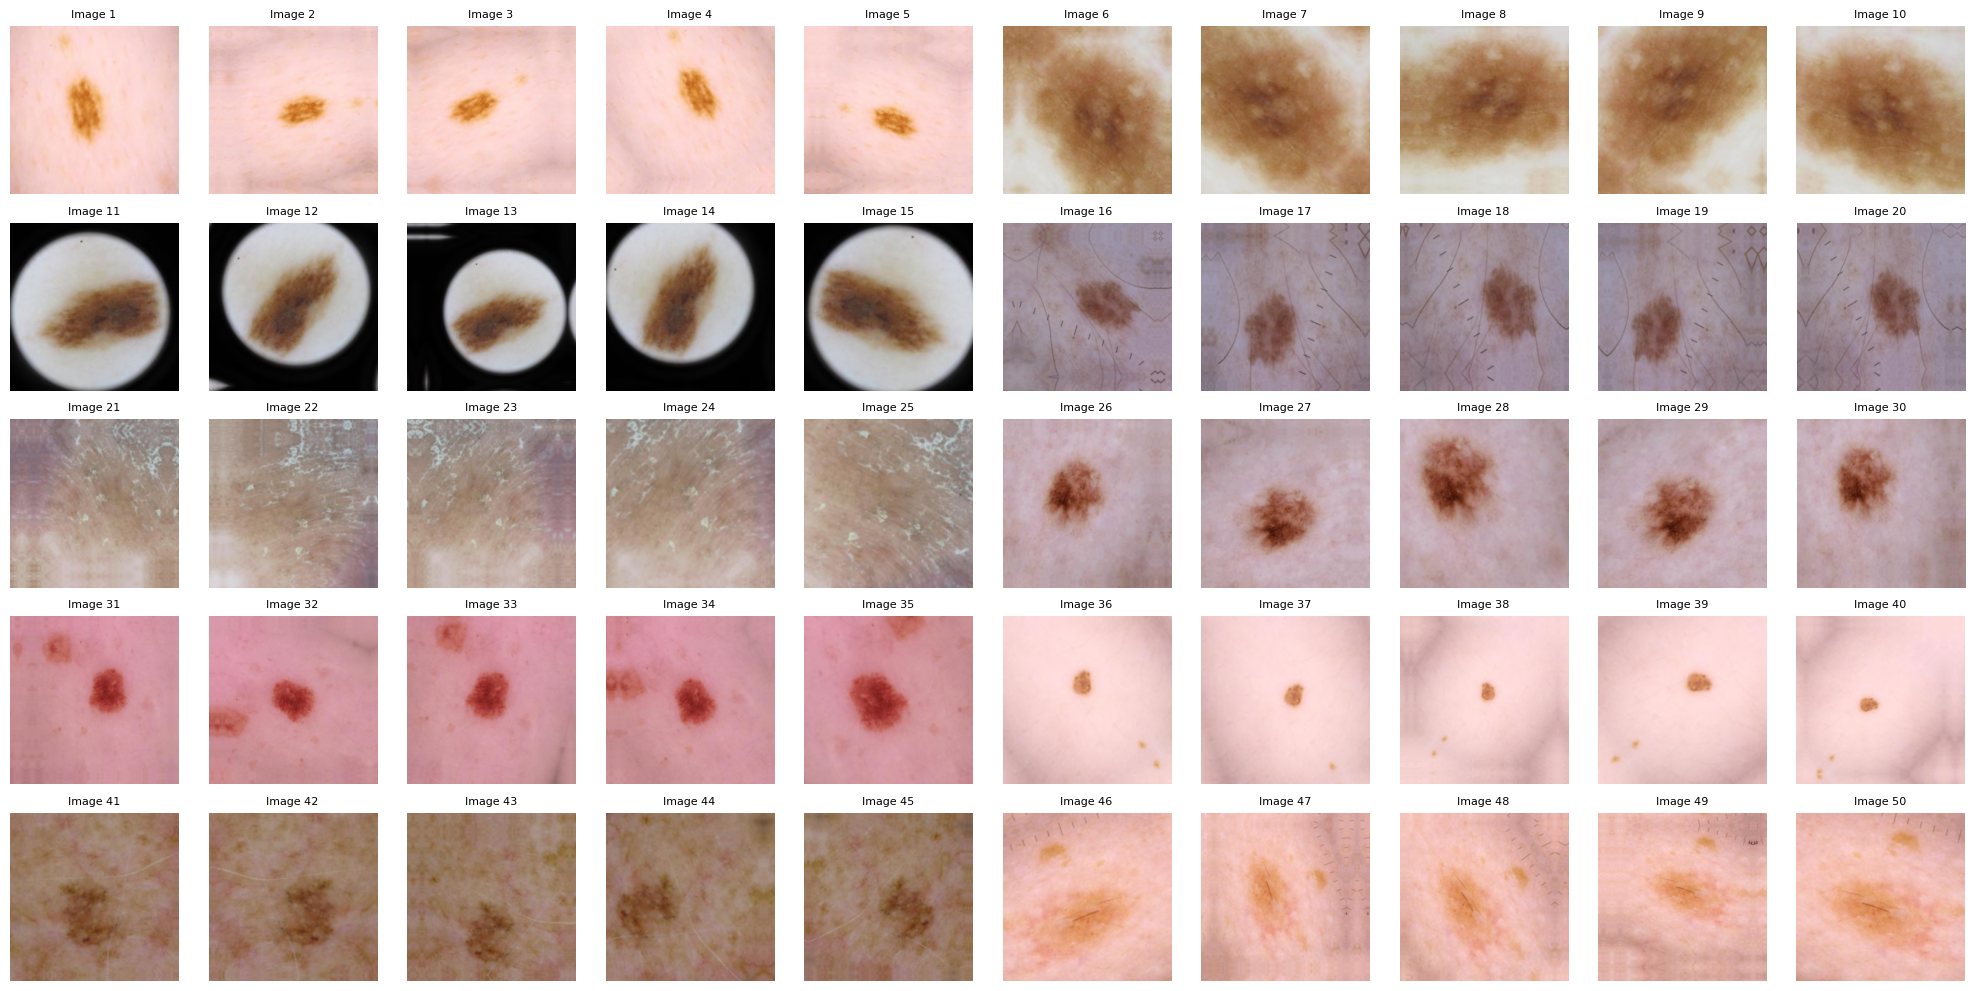

In [24]:
# Set up the subplot grid
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over the subplot grid
for i, ax in enumerate(axes.flat):
    if i < 50:
        # Read the image
        img = X_train_aug[i]
        
        # Display the image
        # ax.imshow(img*255).astype('uint8')  # gives an error
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels
        ax.set_title(f'Image {i+1}', fontsize=8)
    # else:
    #     # Remove the empty subplot
    #     ax.remove()

plt.tight_layout()
plt.show()

# Save files as Pickle files

In [25]:
# Export our final variables to a pickle file using a dictionary
# from google.colab import drive
# drive.mount('/content/drive')

# Create the dictionary
melanoma_dict = {
    'X_train': X_train,
    'X_val': X_val,
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test
}

# Store the dictionary in a pickle file
#with open('/content/drive/My Drive/fungi_dict.pkl', 'wb') as file:
with open('pickles/melanoma.pkl', 'wb') as file:    
    pickle.dump(melanoma_dict, file)

In [26]:
# Save image files 
with open('pickles/X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)

with open('pickles/X_val.pkl', 'wb') as file:
    pickle.dump(X_val, file)
    
with open('pickles/X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)


In [27]:
y_train_df = pd.DataFrame(y_train, columns=["results"])
y_val_df = pd.DataFrame(y_val, columns=["results"])
y_test_df = pd.DataFrame(y_test, columns=["results"])

#from google.colab import drive
#drive.mount('/content/drive')
#import pickle

# And we'll export this as another pkl file
#with open('/content/drive/My Drive/y.pkl', 'wb') as file:
with open('pickles/y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)

with open('pickles/y_val.pkl', 'wb') as file:
    pickle.dump(y_val, file)
    
with open('pickles/y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

### Open pickle files

In [6]:
# Load the images from the pkl file
#with open('/content/drive/My Drive/img.pkl', 'rb') as file:
with open('pickles/X_train.pkl', 'rb') as file:    
    X_train_recalled = pickle.load(file)

X_train_recalled[0]

array([[[0.6815401 , 0.5200144 , 0.5931009 ],
        [0.68590915, 0.5268083 , 0.59729564],
        [0.6873414 , 0.5354318 , 0.6007453 ],
        ...,
        [0.6787546 , 0.50546867, 0.52824354],
        [0.68395925, 0.5109011 , 0.5338868 ],
        [0.69291854, 0.5220494 , 0.54679775]],

       [[0.69382334, 0.5354618 , 0.60601866],
        [0.6946588 , 0.5430132 , 0.6114189 ],
        [0.6931348 , 0.5520543 , 0.61334556],
        ...,
        [0.6948012 , 0.5202645 , 0.5412546 ],
        [0.70183617, 0.52632433, 0.5468541 ],
        [0.7052326 , 0.53431535, 0.5576    ]],

       [[0.6957299 , 0.5448201 , 0.61987585],
        [0.6953767 , 0.5523688 , 0.62432545],
        [0.69664294, 0.5621072 , 0.6252615 ],
        ...,
        [0.6953298 , 0.5271117 , 0.5513072 ],
        [0.7034024 , 0.5312141 , 0.55310744],
        [0.70080423, 0.5366817 , 0.56261796]],

       ...,

       [[0.67971146, 0.5526167 , 0.612023  ],
        [0.6827178 , 0.55637914, 0.6156269 ],
        [0.6907765 , 0

In [7]:
# Open Label Files
with open('pickles/y_train.pkl', 'rb') as file:    
    y_train_recalled = pickle.load(file)

y_train_recalled[0]

1

In [8]:
# Load the images from the pkl file
#with open('/content/drive/My Drive/img.pkl', 'rb') as file:
with open('pickles/X_val.pkl', 'rb') as file:    
    X_val_recalled = pickle.load(file)

print(X_val_recalled[0])

# Open Label Files
with open('pickles/y_val.pkl', 'rb') as file:    
    y_val_recalled = pickle.load(file)

print(y_val_recalled[0])

[[[0.79607844 0.5882353  0.6509804 ]
  [0.79607844 0.5882353  0.6509804 ]
  [0.8        0.5921569  0.654902  ]
  ...
  [0.77254903 0.5764706  0.6117647 ]
  [0.76862746 0.57254905 0.60784316]
  [0.7647059  0.5686275  0.6039216 ]]

 [[0.79607844 0.5882353  0.6509804 ]
  [0.79607844 0.5882353  0.6509804 ]
  [0.8        0.5921569  0.654902  ]
  ...
  [0.78039217 0.58431375 0.61960787]
  [0.7764706  0.5803922  0.6156863 ]
  [0.77254903 0.5764706  0.6117647 ]]

 [[0.79607844 0.5882353  0.6509804 ]
  [0.79607844 0.5882353  0.6509804 ]
  [0.8        0.5921569  0.654902  ]
  ...
  [0.7921569  0.59607846 0.6313726 ]
  [0.7882353  0.5921569  0.627451  ]
  [0.78431374 0.5882353  0.62352943]]

 ...

 [[0.74509805 0.5529412  0.627451  ]
  [0.7490196  0.5568628  0.6313726 ]
  [0.7411765  0.54901963 0.62352943]
  ...
  [0.72156864 0.5254902  0.5294118 ]
  [0.7176471  0.52156866 0.5254902 ]
  [0.70980394 0.52156866 0.52156866]]

 [[0.7294118  0.5372549  0.6117647 ]
  [0.7411765  0.54901963 0.62352943]


In [9]:
# Load the images from the pkl file
#with open('/content/drive/My Drive/img.pkl', 'rb') as file:
with open('pickles/X_test.pkl', 'rb') as file:    
    X_test_recalled = pickle.load(file)

print(X_test_recalled[0])

# Open Label Files
with open('pickles/y_test.pkl', 'rb') as file:    
    y_test_recalled = pickle.load(file)

print(y_test_recalled[0])

[[[0.5568628  0.47058824 0.28627452]
  [0.5568628  0.47058824 0.28627452]
  [0.5568628  0.47058824 0.28627452]
  ...
  [0.58431375 0.49019608 0.38039216]
  [0.5921569  0.49803922 0.3882353 ]
  [0.6039216  0.50980395 0.4       ]]

 [[0.5529412  0.46666667 0.28235295]
  [0.5568628  0.47058824 0.28627452]
  [0.5568628  0.47058824 0.28627452]
  ...
  [0.59607846 0.5019608  0.39215687]
  [0.6039216  0.50980395 0.4       ]
  [0.6117647  0.5176471  0.40784314]]

 [[0.54901963 0.4627451  0.2784314 ]
  [0.5529412  0.46666667 0.28235295]
  [0.5568628  0.47058824 0.28627452]
  ...
  [0.60784316 0.5137255  0.40392157]
  [0.6117647  0.5176471  0.40784314]
  [0.6156863  0.52156866 0.4117647 ]]

 ...

 [[0.5803922  0.49019608 0.36862746]
  [0.5803922  0.49019608 0.36862746]
  [0.5764706  0.4862745  0.3647059 ]
  ...
  [0.5647059  0.49019608 0.37254903]
  [0.56078434 0.4862745  0.36078432]
  [0.5568628  0.48235294 0.35686275]]

 [[0.5803922  0.49019608 0.36862746]
  [0.5764706  0.4862745  0.3647059 ]


Run few models